# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv'
df = pd.read_csv(url, sep=';')

In [3]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [4]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

### Create a line chart showing the number of total units sold per day in February.

In [5]:
df['Month'] = df['SalesDate'].dt.strftime('%B')
df['Day'] = df['SalesDate'].dt.day
df['Hour'] = df['SalesDate'].dt.hour
df['Weekday'] = df['SalesDate'].dt.weekday
df['Date'] = df['SalesDate'].dt.date

In [6]:
agg_day_feb = df.loc[df['SalesDate'].dt.month==2].groupby('Date').sum()['Quantity'].reset_index()

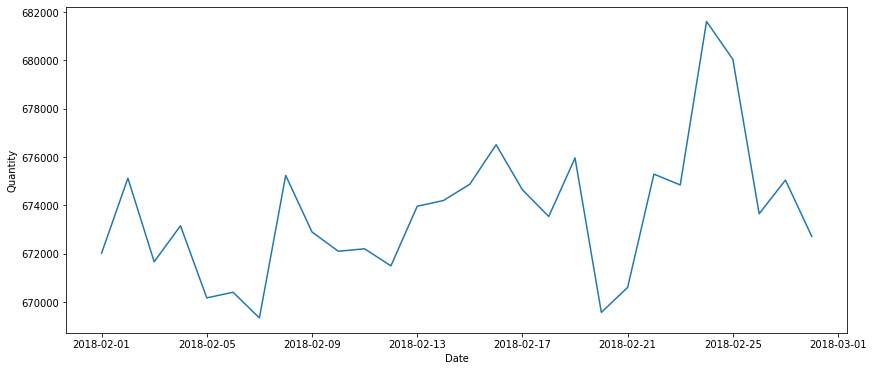

In [7]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Quantity', data=agg_day_feb)
plt.show()

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [8]:
agg_day_march = df.loc[df['SalesDate'].dt.month==3].groupby(['Date','ProductID']).sum()['Quantity'].reset_index()

In [9]:
filter_march = agg_day_march.loc[agg_day_march['ProductID'].isin([124, 344, 407, 449])]

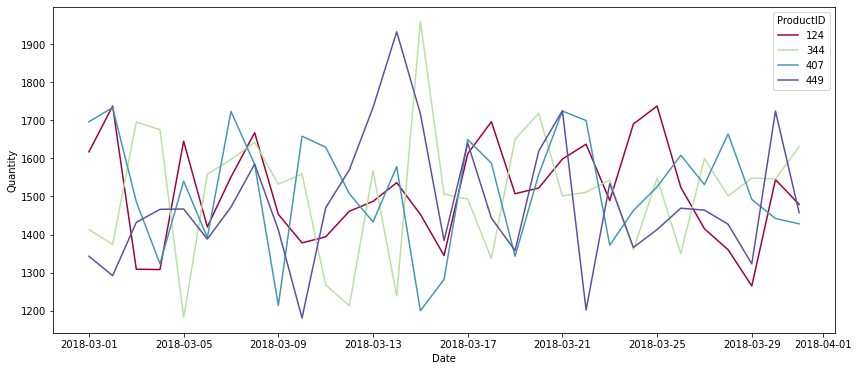

In [10]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Quantity', hue='ProductID', data=filter_march, palette='Spectral')
plt.show()

### Create a bar chart that shows units sold by each hour of the day.

In [11]:
agg_hour = df.groupby('Hour').sum()['Quantity'].reset_index()

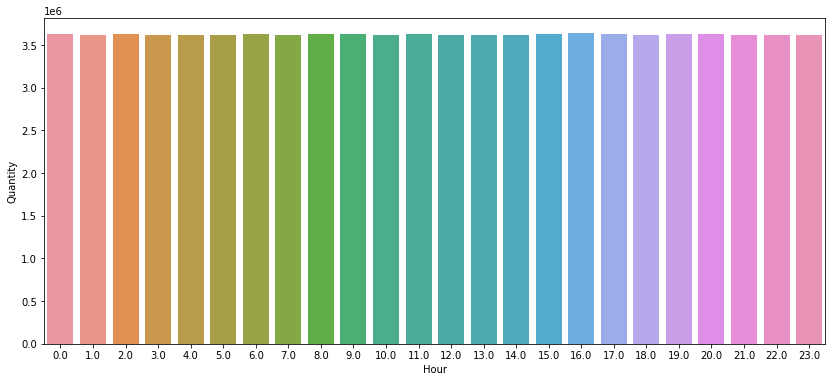

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(x='Hour', y='Quantity', data=agg_hour)
plt.show()

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [13]:
df_pivot = df.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='sum')

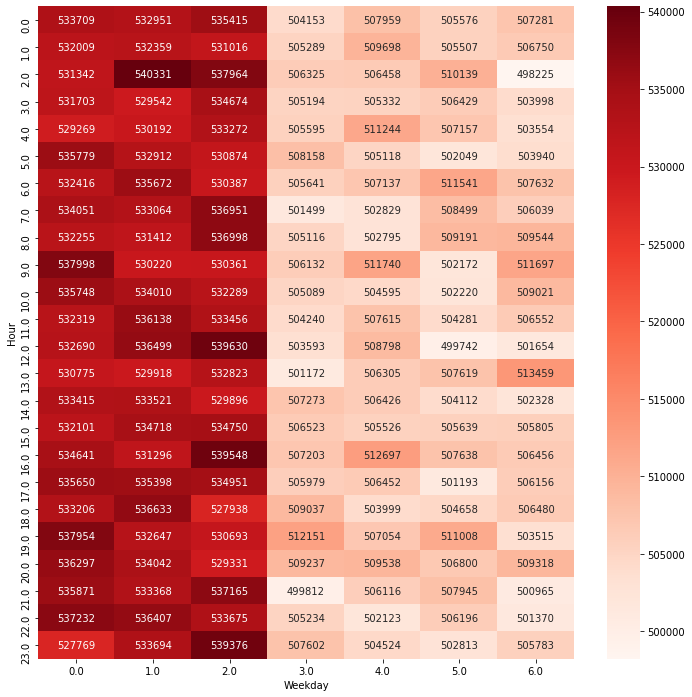

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.show()

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [15]:
random_products = df.drop_duplicates(subset=['ProductID']).sample(20)['ProductID']

In [16]:
product_pivot = df.loc[df['ProductID'].isin(random_products)].pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')

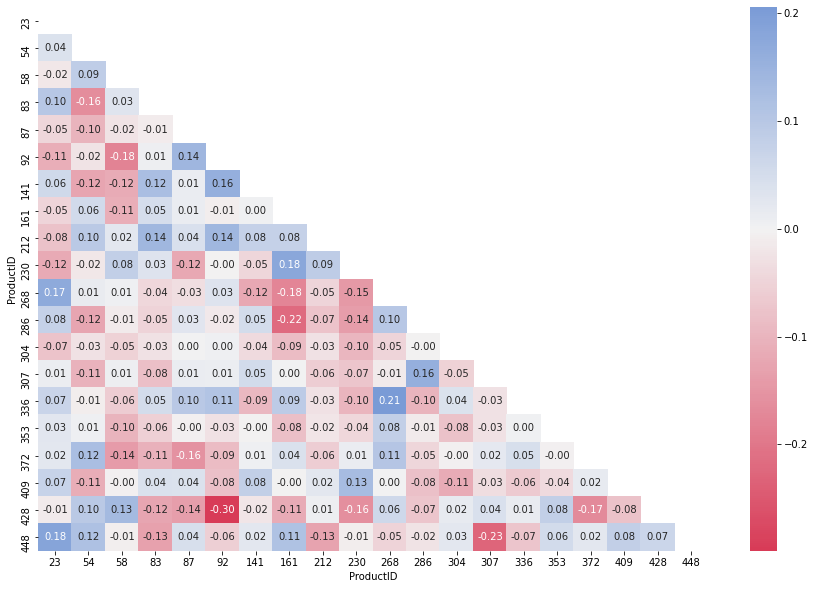

In [17]:
corr = product_pivot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(6,255, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, center=0, fmt='.2f')
plt.show()

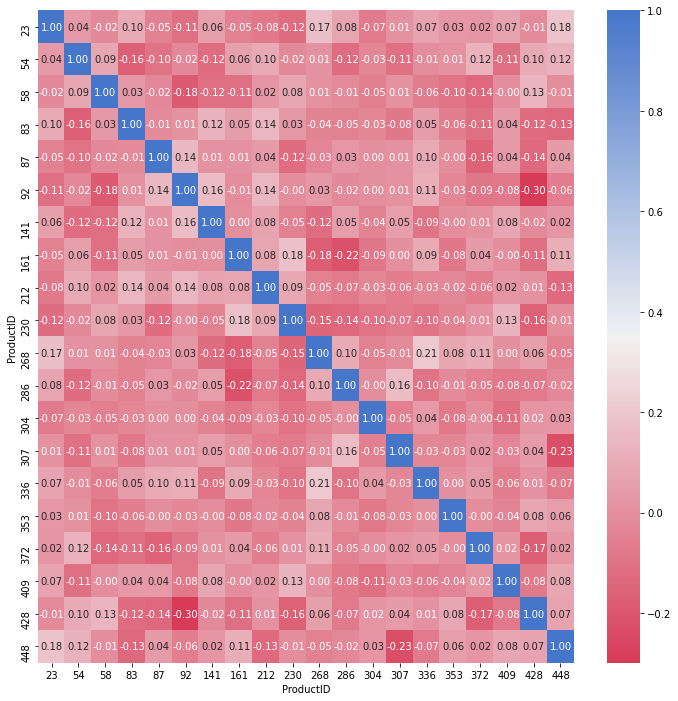

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(product_pivot.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.show()

### Create a histogram showing the distribution of daily units sold.

In [19]:
agg_date = df.groupby('Date').sum()['Quantity'].reset_index()

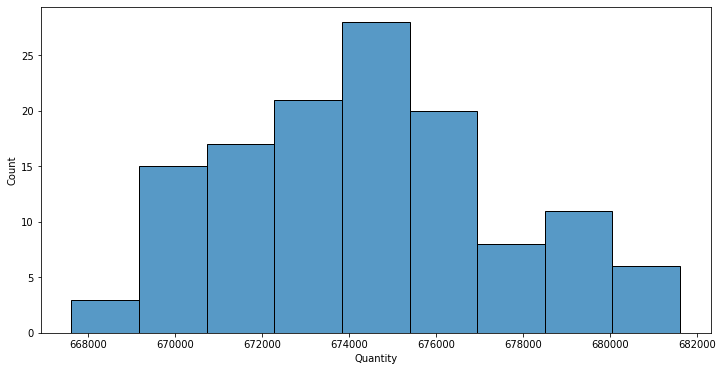

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(agg_date['Quantity'])
plt.show()

### Create a violin plot showing the distribution of daily units sold by month.

In [21]:
agg_date = df.groupby(['Date','Month'], as_index=False).agg({'Quantity':'sum'})

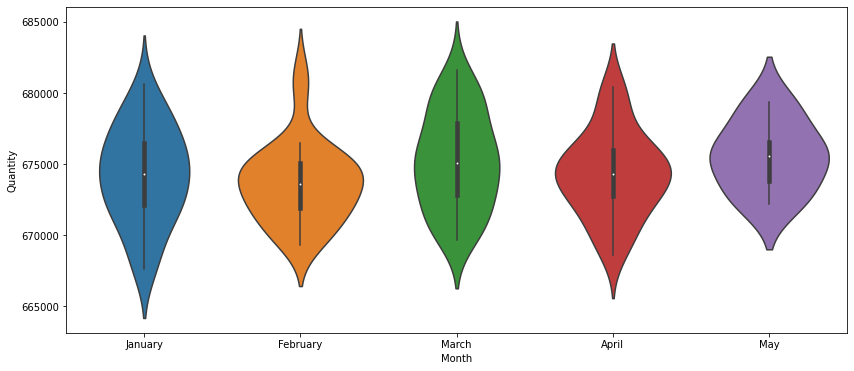

In [22]:
plt.figure(figsize=(14,6))
sns.violinplot(data=agg_date, x='Month', y='Quantity')
plt.show()

#Lecture Notes

In [23]:
web_events_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')
web_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [24]:
web_events_df['timestamp'] = pd.to_datetime(web_events_df['timestamp'], unit='ms')

In [25]:
web_events_df

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN


In [26]:
web_events_df['Date'] = web_events_df['timestamp'].dt.date
web_events_df['Month'] = web_events_df['timestamp'].dt.strftime('%B')
web_events_df['Day'] = web_events_df['timestamp'].dt.day
web_events_df['Hour'] = web_events_df['timestamp'].dt.hour
web_events_df['Minute'] = web_events_df['timestamp'].dt.minute

In [27]:
web_events_df['Weekday'] = web_events_df['timestamp'].dt.weekday

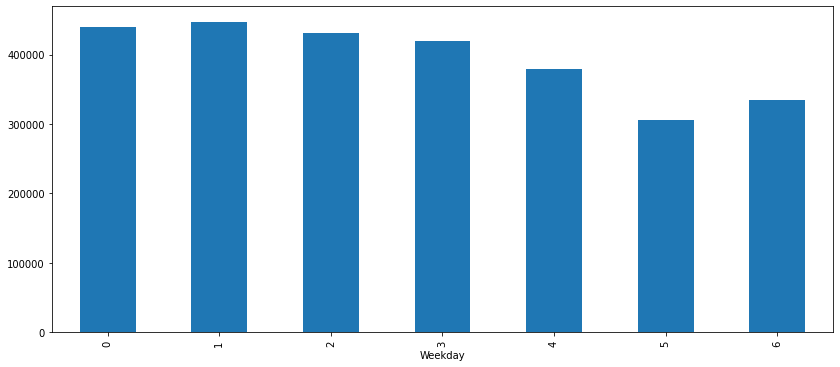

In [28]:
web_events_df.groupby('Weekday').count()['event'].plot(kind='bar', figsize=(14,6))

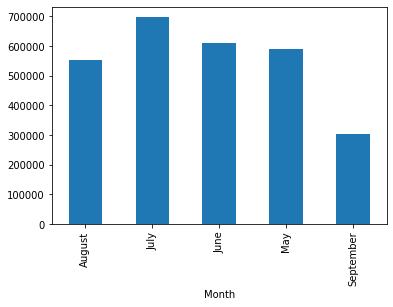

In [29]:
web_events_df.groupby('Month').count()['event'].plot(kind='bar')

In [30]:
agg_df = web_events_df.groupby('Month').count().reset_index()
agg_df

,Month,timestamp,visitorid,event,itemid,transactionid,Date,Day,Hour,Minute,Weekday
0,August,553362,553362,553362,553362,4632,553362,553362,553362,553362,553362
1,July,697984,697984,697984,697984,5802,697984,697984,697984,697984,697984
2,June,610393,610393,610393,610393,5043,610393,610393,610393,610393,610393
3,May,590652,590652,590652,590652,4611,590652,590652,590652,590652,590652
4,September,303710,303710,303710,303710,2369,303710,303710,303710,303710,303710


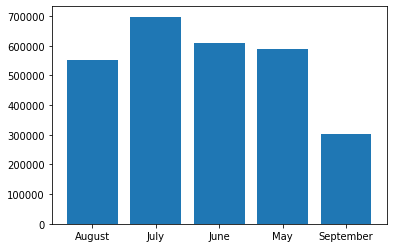

In [31]:
plt.bar(agg_df['Month'], agg_df['event'])
plt.show()

In [32]:
agg_df = web_events_df.groupby('Hour').count()

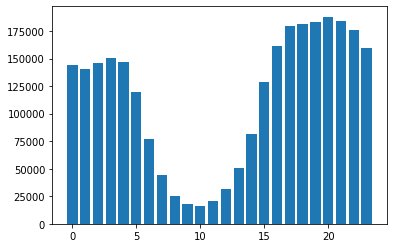

In [33]:
plt.bar(agg_df.index, agg_df['event'])
plt.show()

In [34]:
agg_df = web_events_df.groupby('Date').count()
agg_df

,timestamp,visitorid,event,itemid,transactionid,Month,Day,Hour,Minute,Weekday
Date,,,,,,,,,,
2015-05-03,13683,13683,13683,13683,83,13683,13683,13683,13683,13683
2015-05-04,19414,19414,19414,19414,154,19414,19414,19414,19414,19414
2015-05-05,23015,23015,23015,23015,225,23015,23015,23015,23015,23015
2015-05-06,23920,23920,23920,23920,258,23920,23920,23920,23920,23920
2015-05-07,23164,23164,23164,23164,217,23164,23164,23164,23164,23164
...,...,...,...,...,...,...,...,...,...,...
2015-09-14,20913,20913,20913,20913,154,20913,20913,20913,20913,20913
2015-09-15,20427,20427,20427,20427,158,20427,20427,20427,20427,20427
2015-09-16,11495,11495,11495,11495,137,11495,11495,11495,11495,11495


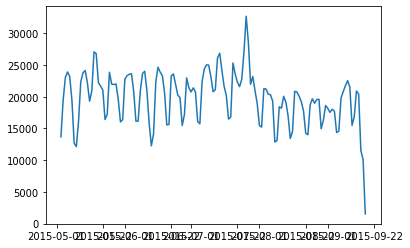

In [35]:
plt.plot(agg_df.index, agg_df['event'])
plt.show()

In [36]:
web_pivot = web_events_df.pivot_table(index='Hour', columns='Month', values='event', aggfunc='count')

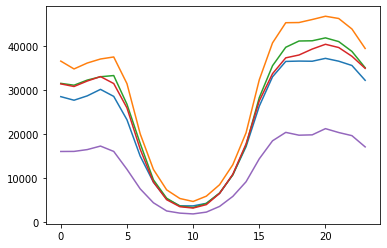

In [37]:
plt.plot(web_pivot)
plt.show()

In [38]:
agg_df = web_events_df.groupby('Month').count().reset_index()
agg_df

,Month,timestamp,visitorid,event,itemid,transactionid,Date,Day,Hour,Minute,Weekday
0,August,553362,553362,553362,553362,4632,553362,553362,553362,553362,553362
1,July,697984,697984,697984,697984,5802,697984,697984,697984,697984,697984
2,June,610393,610393,610393,610393,5043,610393,610393,610393,610393,610393
3,May,590652,590652,590652,590652,4611,590652,590652,590652,590652,590652
4,September,303710,303710,303710,303710,2369,303710,303710,303710,303710,303710


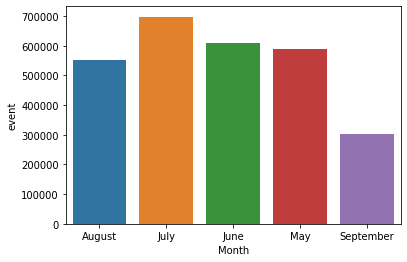

In [39]:
sns.barplot(data=agg_df, x='Month', y='event')
plt.show()

In [40]:
web_pivot = web_events_df.pivot_table(index='Hour', columns='Weekday', values='event', aggfunc='count')
# web_pivot

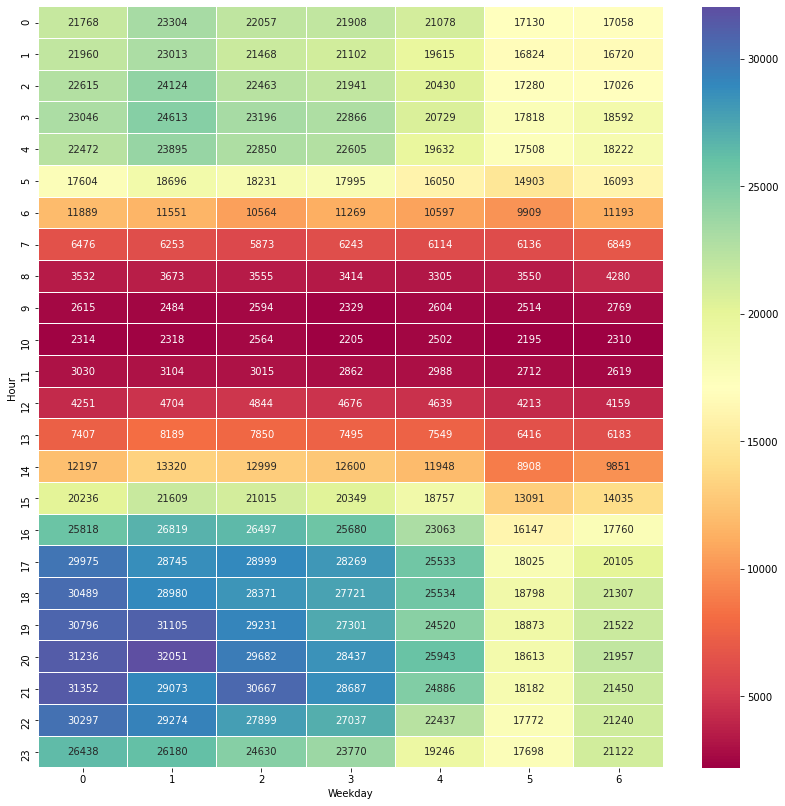

In [41]:
plt.figure(figsize=(14,14))
sns.heatmap(data=web_pivot, annot=True, fmt='.0f', cmap='Spectral', linewidths=0.01)
plt.show()